In [15]:
from utils.LLM import model


from IPython.display import display, Image

In [16]:
from langchain_core.messages import HumanMessage, AIMessage

messages = [AIMessage(f"所以你说你正在研究海洋生物吗?", name="Bot"),
            HumanMessage(f"是的我知道蓝鲸,还有什么其他的可以了解吗?", name="RottenTangerine")]

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

所以你说你正在研究海洋生物吗?
================================ Human Message =================================
Name: RottenTangerine

是的我知道蓝鲸,还有什么其他的可以了解吗?


In [17]:
model.invoke(messages)

AIMessage(content='海洋生物种类繁多，除了蓝鲸，还有许多其他有趣的生物。例如，海豚以其高智商和复杂的社会行为而闻名。章鱼则以其卓越的伪装能力和解决问题的能力著称。珊瑚礁是海洋中的“热带雨林”，拥有极高的生物多样性，包括各种鱼类、甲壳类和软体动物。此外，深海生物如发光鱼和巨型乌贼，由于生活在极端环境中，具有独特的适应机制。这些生物不仅丰富了海洋生态系统，也为科学研究提供了宝贵的资源。', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 24, 'total_tokens': 124, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 24}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_3a5770e1b4', 'finish_reason': 'stop', 'logprobs': None}, id='run-da3d7785-8043-4f66-aa57-a3bb3ce9d58c-0', usage_metadata={'input_tokens': 24, 'output_tokens': 100, 'total_tokens': 124, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})

## Graph

In [18]:
from langgraph.graph import StateGraph, START, END, MessagesState

def chat_model_node(state: MessagesState):
    return {"messages": model.invoke(state["messages"])}

builder = StateGraph(MessagesState)

builder.add_node("chat_model_node", chat_model_node)

builder.add_edge(START, "chat_model_node")
builder.add_edge("chat_model_node", END)

graph = builder.compile()

In [19]:
output = graph.invoke({"messages": messages})
for m in output["messages"]:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

所以你说你正在研究海洋生物吗?
================================ Human Message =================================
Name: RottenTangerine

是的我知道蓝鲸,还有什么其他的可以了解吗?
================================== Ai Message ==================================

海洋生物种类繁多，除了蓝鲸，还有许多其他有趣的生物。例如，海豚以其高智商和复杂的社会行为而闻名，它们能够使用回声定位来导航和捕食。章鱼则以其卓越的伪装能力和解决问题的能力著称，它们能够改变皮肤颜色和纹理以融入环境，甚至能够使用工具。珊瑚礁是海洋中的“热带雨林”，它们支持着丰富的生物多样性，包括各种鱼类、甲壳类和软体动物。此外，深海生物如发光鱼和巨型乌贼，适应了极端的环境条件，展现了生命的顽强和多样性。这些生物不仅丰富了海洋生态系统，也为科学研究提供了宝贵的资源。


# Filter: For Long Running Conversations

In [20]:
messages = [
    AIMessage("Hi.", name="Bot", id="1"),
    HumanMessage("Hi.", name="Lance", id="2"),
    AIMessage(f"所以你说你正在研究海洋生物吗?", name="Bot", id="3"),
    HumanMessage(f"是的我了解蓝鲸,可以详细讲讲还有什么其他的可以了解吗?", name="RottenTangerine", id="4")
]

## Delete messages before LLM model invoke

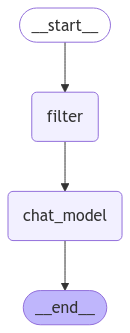

In [33]:
from langchain_core.messages import RemoveMessage

# Create Filter Node
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [model.invoke(state["messages"])]}


# Build graph
builder = StateGraph(MessagesState)

builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)

builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

所以你说你正在研究海洋生物吗?
================================ Human Message =================================
Name: RottenTangerine

是的我了解蓝鲸,可以详细讲讲还有什么其他的可以了解吗?
================================== Ai Message ==================================

当然可以！海洋生物种类繁多，除了蓝鲸，还有很多其他有趣的生物值得了解。以下是一些不同类别的海洋生物，供你参考：

### 1. **海洋哺乳动物**
   - **海豚**：海豚是高度智能的海洋哺乳动物，以其社交行为和回声定位能力闻名。它们通常生活在群体中，被称为“海豚群”。
   - **虎鲸（逆戟鲸）**：虎鲸是顶级捕食者，以复杂的社交结构和狩猎技巧著称。它们会捕食鱼类、海豹甚至其他鲸类。
   - **海豹和海狮**：这些鳍足类动物适应了水生和陆地生活，通常生活在寒冷的海域。

### 2. **鱼类**
   - **鲨鱼**：鲨鱼是海洋中的顶级掠食者，种类繁多，从大白鲨到温和的鲸鲨都有。鲸鲨是世界上最大的鱼类，以浮游生物为食。
   - **珊瑚鱼**：珊瑚礁是海洋中最丰富的生态系统之一，生活着许多色彩斑斓的鱼类，如小丑鱼、蝴蝶鱼和鹦嘴鱼。
   - **鳗鱼**：鳗鱼有着独特的生活史，许多种类会在淡水和海水之间迁徙，如欧洲鳗鲡。

### 3. **无脊椎动物**
   - **章鱼和乌贼**：这些头足类动物以其高智商和复杂的伪装能力著称。章鱼有八条触手，而乌贼有十条。
   - **珊瑚**：珊瑚是由微小的珊瑚虫组成的，它们分泌碳酸钙形成珊瑚礁。珊瑚礁是海洋生物多样性的热点。
   - **海星和海胆**：这些棘皮动物在海洋生态系统中扮演着重要角色，尤其是海胆，它们可以控制海藻的生长。

### 4. **海洋爬行动物**
   - **海龟**：海龟是古老的海洋爬行动物，种类包括绿海龟、玳瑁和棱皮龟。它们在全球的海洋中

## Filter the messages pass to the chat model

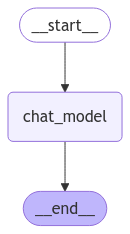

In [32]:
# Node
def chat_model_node(state: MessagesState):
    # model only receives the latest message content.
    return {"messages": [model.invoke(state["messages"][-1:])]}

# Build graph
builder = StateGraph(MessagesState)

builder.add_node("chat_model", chat_model_node)

builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

所以你说你正在研究海洋生物吗?
================================ Human Message =================================
Name: RottenTangerine

是的我了解蓝鲸,可以详细讲讲还有什么其他的可以了解吗?
================================== Ai Message ==================================

当然可以！蓝鲸（Balaenoptera musculus）是地球上已知最大的动物，也是现存最大的哺乳动物。除了蓝鲸，海洋中还有许多其他令人惊叹的生物和生态系统值得了解。以下是一些你可以进一步探索的主题：

### 1. **其他鲸类**
   - **座头鲸（Humpback Whale）**：以其复杂的歌声和壮观的跃出水面行为而闻名。
   - **抹香鲸（Sperm Whale）**：以其巨大的头部和深潜能力著称，是《白鲸记》中的主角。
   - **虎鲸（Orca）**：也被称为“杀人鲸”，是海洋中的顶级掠食者，具有高度的社会性和智慧。

### 2. **海洋生态系统**
   - **珊瑚礁**：被称为“海洋中的热带雨林”，是地球上生物多样性最丰富的生态系统之一。
   - **深海生态系统**：包括热液喷口、冷泉和深海平原，这些地方生活着许多独特的生物，如管虫、深海鱼和巨型乌贼。

### 3. **海洋哺乳动物**
   - **海豚**：以其高智商和复杂的社会行为而闻名。
   - **海豹和海狮**：这些鳍足类动物在海洋和陆地之间生活

# Trim: Truncate for long message

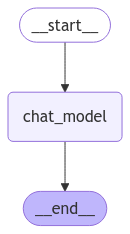

In [31]:
from langchain_core.messages import trim_messages
from langchain_openai import ChatOpenAI

# Node
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=False,
        )
    return {"messages": [model.invoke(messages)]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Orcas live!", name="Lance"))

output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

# Summary: Summarized by LLM

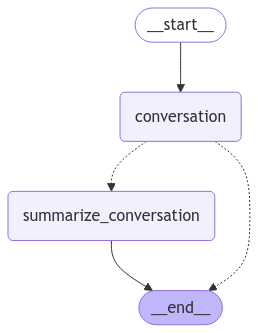

In [35]:
from langchain_core.messages import SystemMessage

def summarize_conversation(state: MessagesState):
    # First, we get any existing summary
    summary = state.get("summary", "")

    # Create our summarization prompt 
    if summary:
        # A summary already exists
        summary_message = (
            f"This is summary of the conversation to date: {summary}\n\n"
            "Extend the summary by taking into account the new messages above:"
        )
        
    else:
        summary_message = "Create a summary of the conversation above:"

    # Add prompt to our history
    messages = state["messages"] + [HumanMessage(content=summary_message)]
    response = model.invoke(messages)
    
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"summary": response.content, "messages": delete_messages}

def call_model(state: MessagesState):
    # Get summary if it exists
    summary = state.get("summary", "")

    # If there is summary, then we add it
    if summary:
        # Add summary to system message
        system_message = f"Summary of conversation earlier: {summary}"

        # Append summary to any newer messages
        messages = [SystemMessage(content=system_message)] + state["messages"]
    else:
        messages = state["messages"]
    
    response = model.invoke(messages)
    return {"messages": response}

def should_continue(state: MessagesState):
    messages = state["messages"]
    
    if len(messages) > 6:
        return "summarize_conversation"
    return END


builder = StateGraph(MessagesState)
builder.add_node("conversation", call_model)
builder.add_node(summarize_conversation)

# Set the entrypoint as conversation
builder.add_edge(START, "conversation")
builder.add_conditional_edges("conversation", should_continue)
builder.add_edge("summarize_conversation", END)

# Compile
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))